we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/home">Breast Cancer Wisconsin (Diagnostic) Data Set</a> dataset obtained from the UCI Machine Learning.
## Atrribute Information

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)


In [1]:
import pandas as pd #Data preprocessing
import numpy as np #Liner algebra library
import seaborn as sns 
import matplotlib.pyplot as plt #MATLAB style plotting
%matplotlib inline
plt.rc('font',size=14)
sns.set(style='darkgrid')

from scipy import stats #Stats Library
from scipy.stats import norm,skew


import warnings 

def ignore_warning(*args,**kwargs): #Ignore annoying warning
    pass

warnings.warn = ignore_warning

In [2]:
from subprocess import check_output
print(check_output(['ls','../Breast_cancer/']).decode('utf8'))

Breast_cancer.ipynb
data.csv
Data_Exploration.ipynb



## Load train dataset

In [3]:
df = pd.read_csv('data.csv')

## Varible Identification

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#Display first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#Summary of dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
print(df.shape)

(569, 33)


In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#Unnamed: 32 feature includes NaN so we do not need it
df = df.drop(labels = 'Unnamed: 32',axis=1) 

In [10]:
numerical_feats = df.dtypes[df.dtypes!='object'].index
categorical_feats = df.dtypes[df.dtypes=='object'].index
print('Number of Numerical feature : {}'.format(len(numerical_feats)))
print('Number of Categorical feature : {}'.format(len(categorical_feats)))


Number of Numerical feature : 31
Number of Categorical feature : 1


percentage of Benign 63%
percentage of Malignant 37%


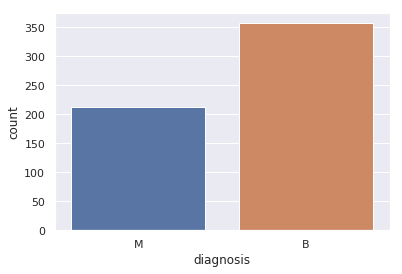

In [11]:
sns.countplot(x='diagnosis',data=df)
b,m = df['diagnosis'].value_counts()
print('percentage of Benign {}%'.format(round((b/len(df))*100)))
print('percentage of Malignant {}%'.format(round((m/len(df))*100)))


In [12]:
df_1  = df.drop(labels=['id','diagnosis'],axis=1) #ID varible is not useful and dignosis attribute is label

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Skewkness of data

In [14]:
for i in numerical_feats[1:]:
    print("Feature : %s"%(i))
    print("Skewness {:.4f}".format(df_1[i].skew()))
    print('Kurtosis {:.4f}'.format(df_1[i].kurt()))
    print("*"*50)

Feature : radius_mean
Skewness 0.9424
Kurtosis 0.8455
**************************************************
Feature : texture_mean
Skewness 0.6504
Kurtosis 0.7583
**************************************************
Feature : perimeter_mean
Skewness 0.9907
Kurtosis 0.9722
**************************************************
Feature : area_mean
Skewness 1.6457
Kurtosis 3.6523
**************************************************
Feature : smoothness_mean
Skewness 0.4563
Kurtosis 0.8560
**************************************************
Feature : compactness_mean
Skewness 1.1901
Kurtosis 1.6501
**************************************************
Feature : concavity_mean
Skewness 1.4012
Kurtosis 1.9986
**************************************************
Feature : concave points_mean
Skewness 1.1712
Kurtosis 1.0666
**************************************************
Feature : symmetry_mean
Skewness 0.7256
Kurtosis 1.2879
**************************************************
Feature : fractal_dimension_mea

## Correlation

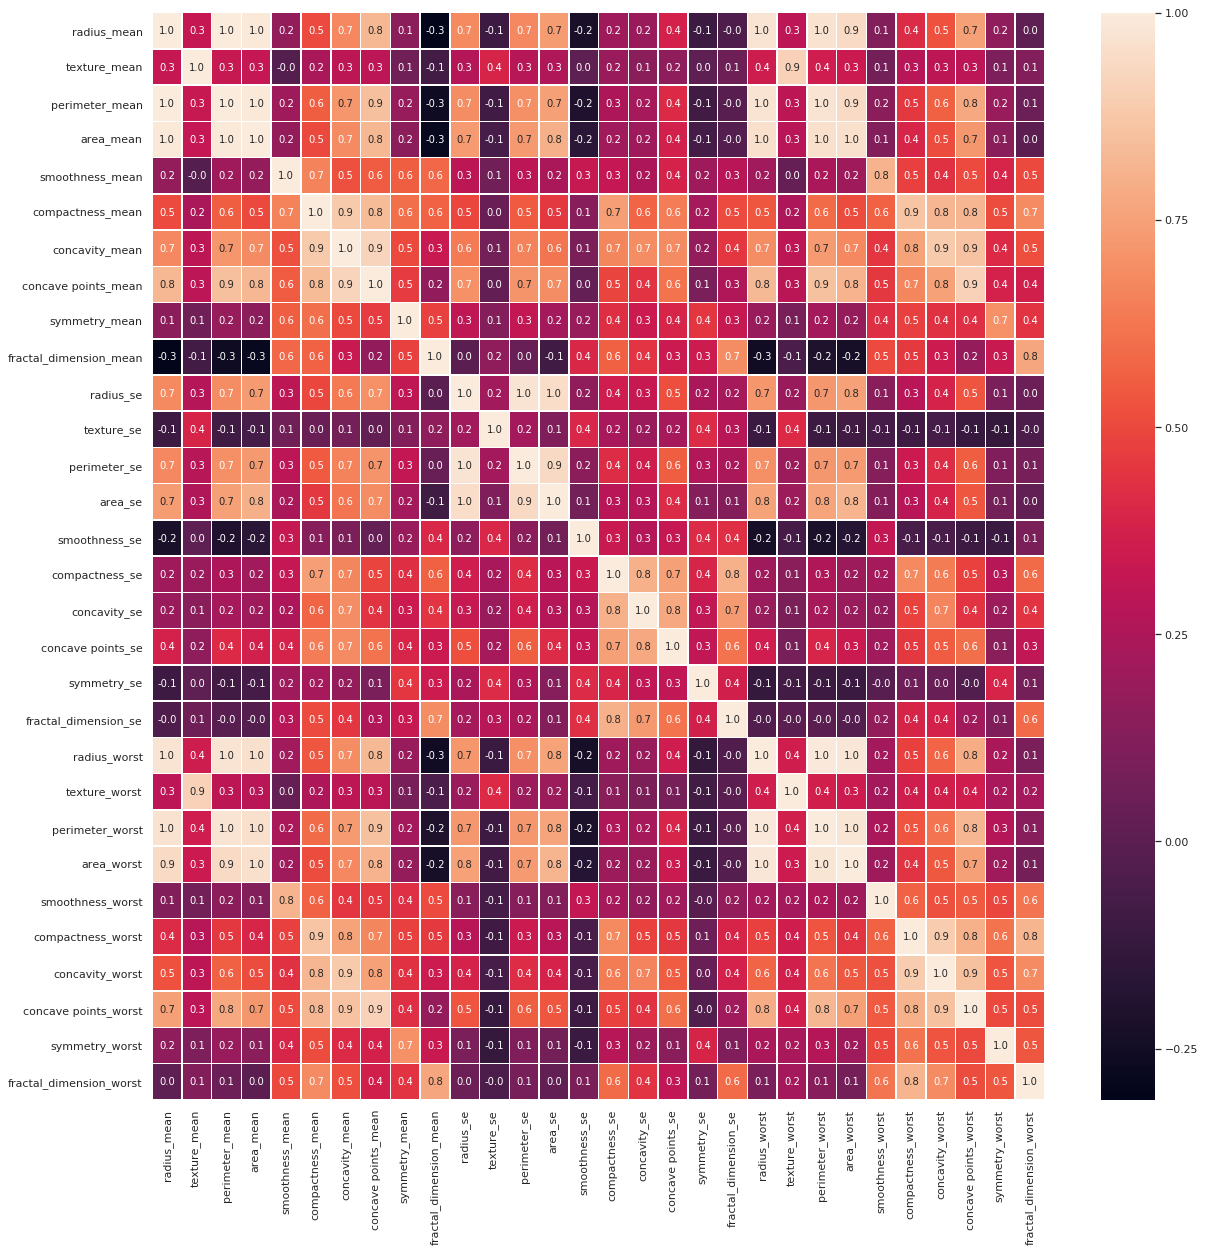

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(),annot=True,linewidths=0.5,fmt='.1f')

(radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst) is highly correlated.
and (radius_se,perimeter_se,area_se) is also highly correlated.
keeping the feature 1,10,20 and drop all highly correlated attributes

In [16]:
df_1 = df_1.drop(labels=['area_mean','perimeter_mean','area_se','perimeter_se','area_worst','perimeter_worst'],axis=1)

## Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
scaled_data = sc.fit_transform(df_1)

In [19]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Appliyng PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

In [22]:
print(pca_data.shape)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.sum())

(569, 11)
[10.25667684  3.83044529  2.47501246  1.87258651  1.56028795  1.20577725
  0.51571697  0.45162422  0.36201839  0.28796638  0.26860161]
0.9602558201892889


In [23]:
n = ['PC'+str(i) for i in range(1,pca_data.shape[1]+1)]

In [24]:
pca_ratio = np.round((pca.explained_variance_ratio_)*100,decimals=1)


Text(0,0.5,'Explained Varible Variance')

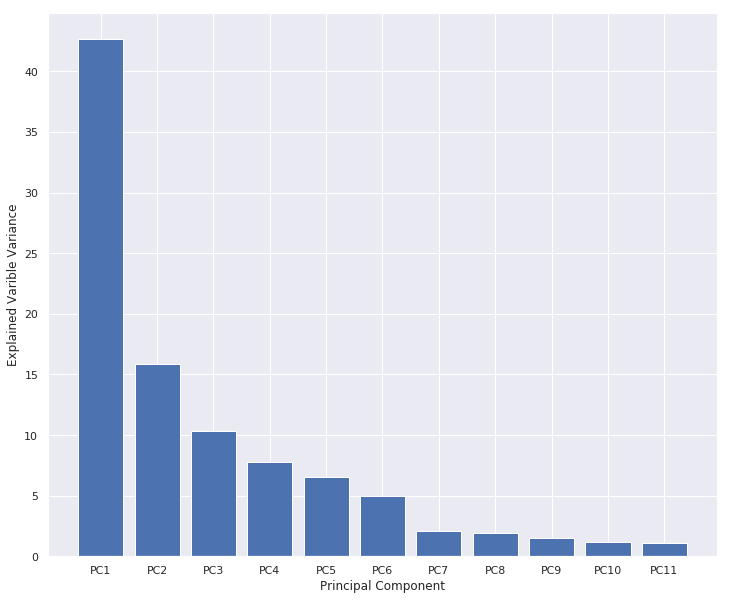

In [25]:
plt.figure(figsize=(12,10))
plt.bar(x=range(1,len(pca_ratio)+1),height=pca_ratio,tick_label=n)
plt.xlabel("Principal Component")
plt.ylabel('Explained Varible Variance')

In [26]:
loading = pca.components_
print("EigenValues :- {}".format(pca.explained_variance_))
print('Eigenector :- {}'.format(pca.components_))

EigenValues :- [10.25667684  3.83044529  2.47501246  1.87258651  1.56028795  1.20577725
  0.51571697  0.45162422  0.36201839  0.28796638  0.26860161]
Eigenector :- [[ 1.74262679e-01  1.01949163e-01  1.98977141e-01  2.96070633e-01
   2.92529070e-01  2.70608954e-01  1.95133652e-01  1.59431414e-01
   1.80878150e-01  3.48975670e-02  5.62641943e-02  2.38595291e-01
   2.12857706e-01  2.25823098e-01  8.17701154e-02  1.74320818e-01
   1.87948173e-01  1.09319132e-01  1.85423032e-01  2.69068583e-01
   2.77263828e-01  2.72491143e-01  1.74017634e-01  2.16381399e-01]
 [-3.80249098e-01 -1.68553377e-01  1.22625261e-01  1.65013204e-02
  -8.67480331e-02 -1.91295673e-01  1.32321430e-01  3.77989809e-01
  -1.65974477e-01  1.38282967e-01  2.97160216e-01  1.83330745e-01
   1.51040118e-01  7.31559785e-02  2.49825852e-01  3.00023878e-01
  -3.77871254e-01 -1.75617897e-01  7.45203084e-02 -2.14517796e-02
  -7.55447324e-02 -1.96231236e-01  3.34184051e-02  1.81763807e-01]
 [ 1.01961771e-01  2.47150720e-01 -1.91861

In [27]:
type(df.diagnosis)

pandas.core.series.Series

In [28]:
pca_df = pd.DataFrame(data=pca_data,columns=n)
pca_df['dignosis'] = df.diagnosis
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,dignosis
0,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321,M
1,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121,M
2,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.352640,-0.654396,-0.284427,M
3,10.670616,5.914865,-4.302831,1.998226,-1.846898,3.101734,-0.812473,-1.813327,1.334007,-0.454319,-1.428596,M
4,2.037480,-1.154659,0.905585,-3.346186,-0.640128,-1.333159,0.604286,-0.462435,-0.232974,0.375830,0.567374,M


In [29]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
PC1         569 non-null float64
PC2         569 non-null float64
PC3         569 non-null float64
PC4         569 non-null float64
PC5         569 non-null float64
PC6         569 non-null float64
PC7         569 non-null float64
PC8         569 non-null float64
PC9         569 non-null float64
PC10        569 non-null float64
PC11        569 non-null float64
dignosis    569 non-null object
dtypes: float64(11), object(1)
memory usage: 53.4+ KB


In [30]:
pca_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.607775e-16,6.614510e-17,5.073075e-18,9.287630e-17,1.648749e-16,-3.238963e-17,3.512129e-17,-2.224348e-17,3.287743e-17,3.990169e-17,-2.073132e-17
std,3.202605e+00,1.957152e+00,1.573217e+00,1.368425e+00,1.249115e+00,1.098079e+00,7.181344e-01,6.720299e-01,6.016796e-01,5.366250e-01,5.182679e-01
min,-5.551687e+00,-5.642401e+00,-4.700775e+00,-4.905031e+00,-4.704178e+00,-4.363391e+00,-3.490317e+00,-3.042811e+00,-2.508777e+00,-1.966258e+00,-1.850985e+00
25%,-2.431561e+00,-1.219669e+00,-1.088963e+00,-9.237203e-01,-7.048180e-01,-7.558143e-01,-3.831126e-01,-3.661438e-01,-3.347095e-01,-2.632139e-01,-3.165800e-01
50%,-7.589002e-01,-7.382824e-02,-1.319054e-01,-1.154712e-01,2.243575e-02,-6.906187e-02,2.125289e-02,1.726597e-02,4.215279e-02,9.793730e-03,-2.938010e-04
75%,2.038320e+00,1.094763e+00,9.174751e-01,8.748378e-01,6.240914e-01,6.073122e-01,4.001574e-01,3.954629e-01,3.366826e-01,2.598766e-01,3.154475e-01
max,1.144466e+01,9.837656e+00,7.269859e+00,5.057914e+00,5.705029e+00,5.066190e+00,4.496099e+00,3.736879e+00,3.328737e+00,5.190091e+00,2.367629e+00


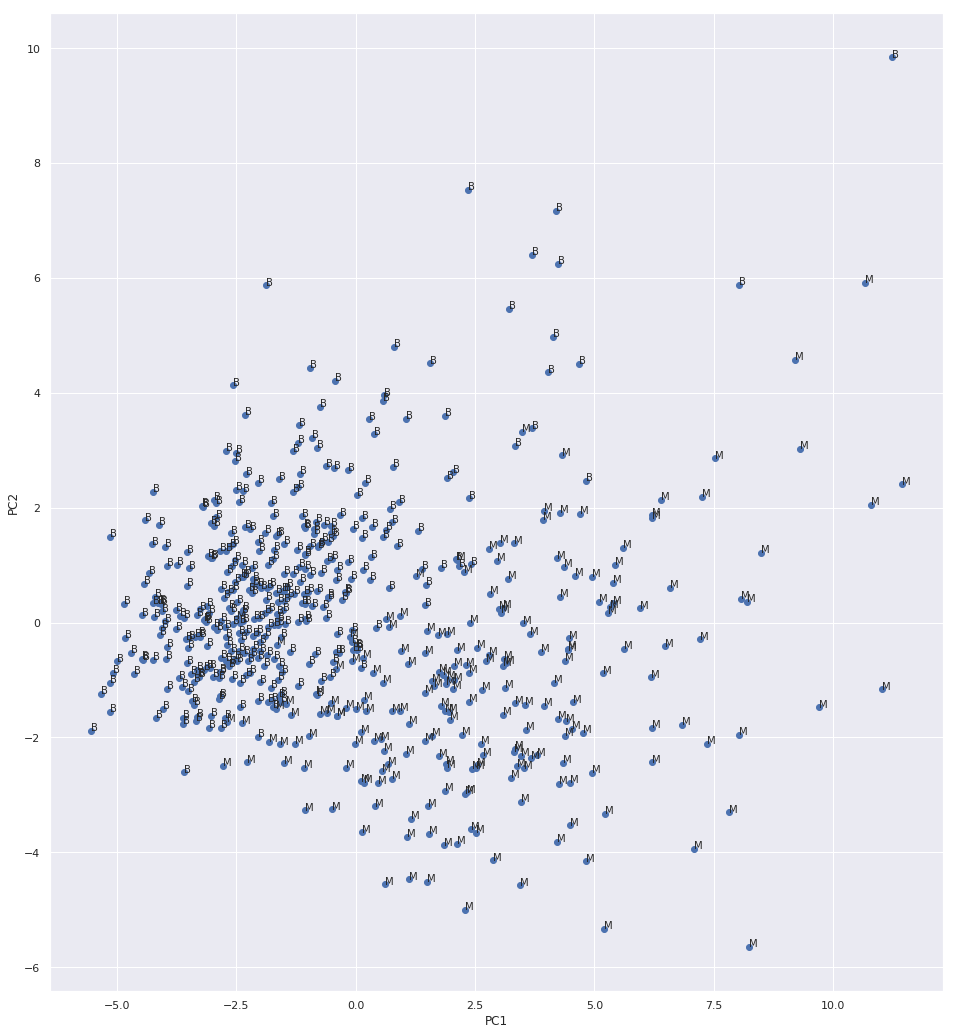

In [31]:
plt.figure(figsize=(16,18))
plt.scatter(x=pca_df.PC1,y=pca_df.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,dignosis in enumerate(pca_df.dignosis):
    plt.annotate(dignosis,(pca_df.iloc[i].PC1,pca_df.iloc[i].PC2))

<Figure size 864x720 with 0 Axes>

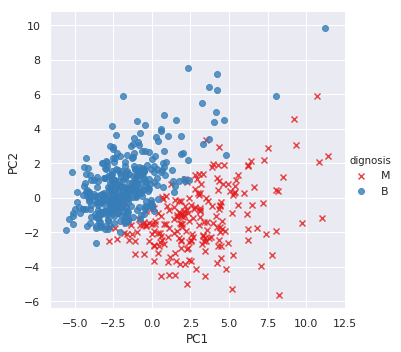

In [32]:
plt.figure(figsize=(12,10))
sns.lmplot(x='PC1',y='PC2',data=pca_df,hue='dignosis',markers=['x','o'],fit_reg=False,palette='Set1')

### Modelling

In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(pca_df.iloc[:,:-1],pca_df.iloc[:,-1],test_size=0.25,random_state=42)

## Nearest Neighbors classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier()

[0.955 0.948 0.951 0.958 0.96  0.955 0.958 0.955 0.951 0.953 0.958 0.955
 0.951 0.953 0.953 0.95  0.95  0.948 0.946 0.948 0.943 0.941 0.941 0.946
 0.944 0.946 0.946 0.944 0.941 0.941 0.941 0.941 0.939 0.937 0.937 0.932
 0.934 0.93  0.932 0.934 0.932 0.932 0.932 0.932 0.932 0.93  0.93  0.93
 0.93  0.927]


Text(0,0.5,'Accuracy score')

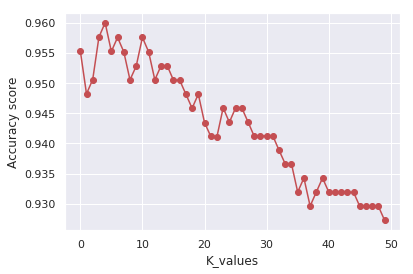

In [36]:
k_score=[]
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=5)
    k_score.append(score.mean())
print(np.round(k_score,decimals=3))
plt.plot(k_score,color='r',marker='o')
plt.xlabel('K_values')
plt.ylabel('Accuracy score')


In [37]:
from sklearn.grid_search import GridSearchCV

In [38]:
k_score = list(range(1,50))
param = {'n_neighbors':k_score}

In [39]:
knn=KNeighborsClassifier(n_neighbors=1)

In [40]:
sc = ['accuracy']

In [41]:
grid_knn= GridSearchCV(estimator=knn,param_grid=param,cv=10)


In [51]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [52]:
grid_knn.best_params_

{'n_neighbors': 5}

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.958041958041958

In [55]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          B       0.98      0.96      0.97        89
          M       0.93      0.96      0.95        54

avg / total       0.96      0.96      0.96       143



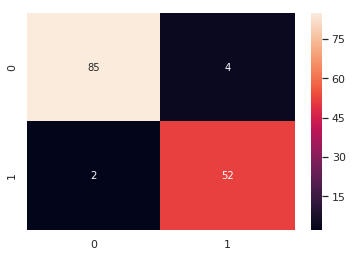

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

## Logistic Classifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
log= LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,100,1000]}
grid_log = GridSearchCV(log,param_grid=param,cv=10,verbose=3)
grid_log.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.860465 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.976744 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.930233 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.906977 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.906977 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.906977 -   0.0s
[CV] C=0.001 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [59]:
grid_log.best_params_

{'C': 0.1}

In [60]:
log = LogisticRegression(C=0.1)

In [61]:
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test,y_pred)

0.972027972027972

In [63]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          B       0.99      0.97      0.98        89
          M       0.95      0.98      0.96        54

avg / total       0.97      0.97      0.97       143



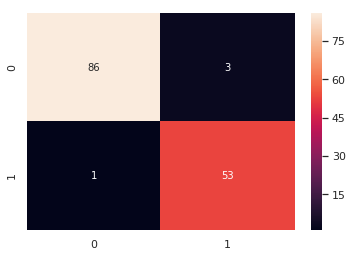

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')